**K-Means Clustering**

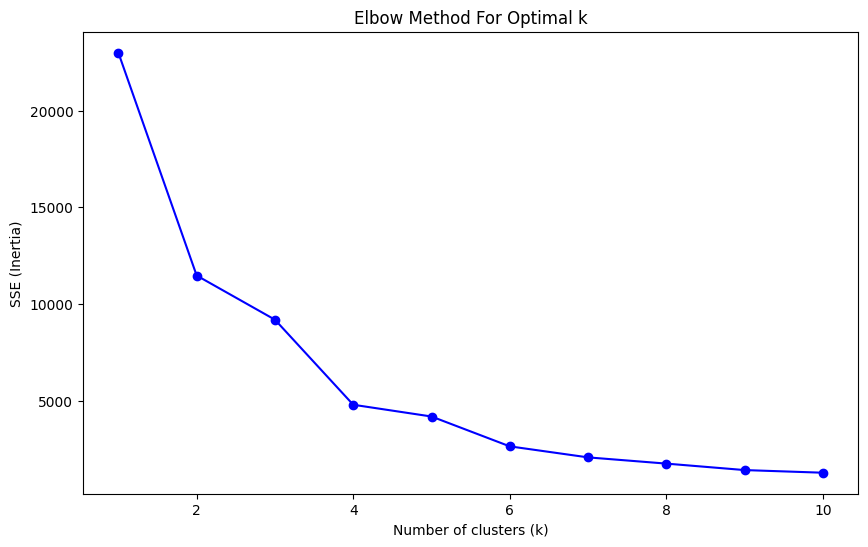

Silhouette Score for k=2: 0.4849916541949793
Silhouette Score for k=3: 0.34169476287889344
Silhouette Score for k=4: 0.45964590091045476
Silhouette Score for k=5: 0.40650730097934645
Silhouette Score for k=6: 0.4518788014791977
Silhouette Score for k=7: 0.47233844762571725
Silhouette Score for k=8: 0.4716426463248184
Silhouette Score for k=9: 0.46881810095964355
Silhouette Score for k=10: 0.4652290959755768


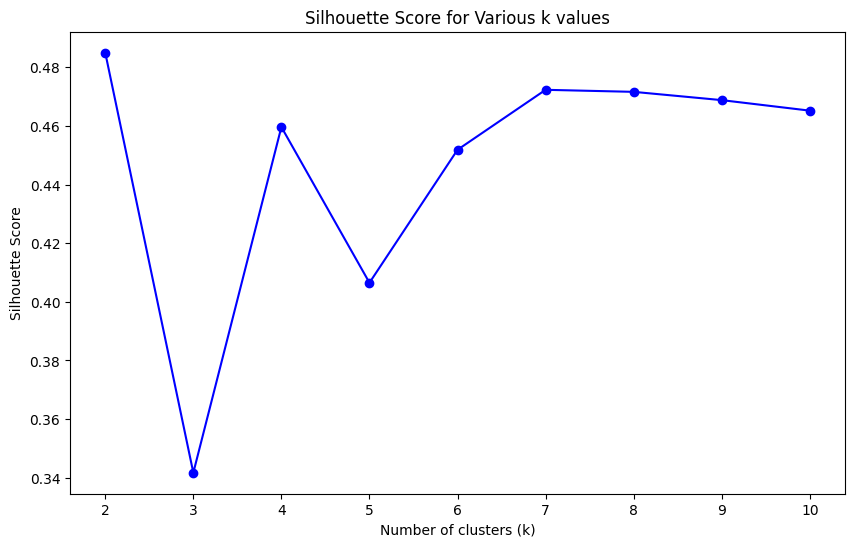

Optimal number of clusters based on silhouette score: 2


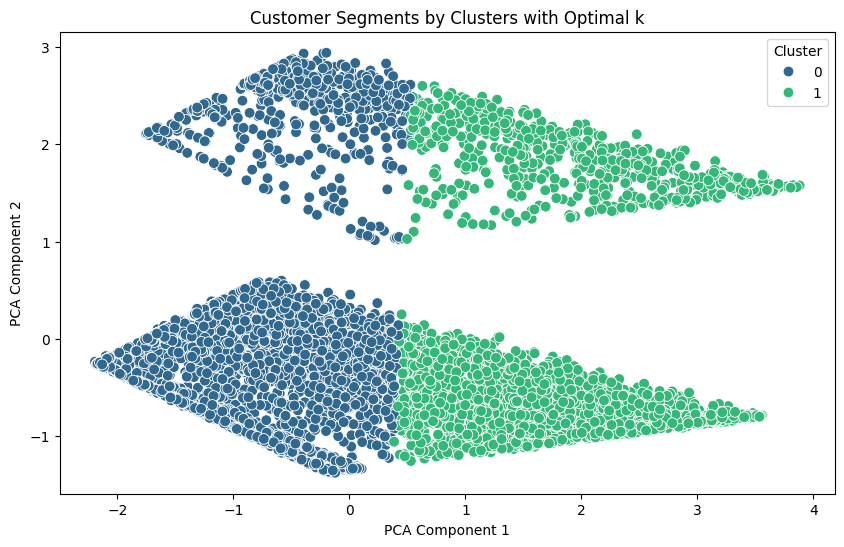

<ipython-input-7-ed731190ab10>:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['Cluster'], palette='viridis')


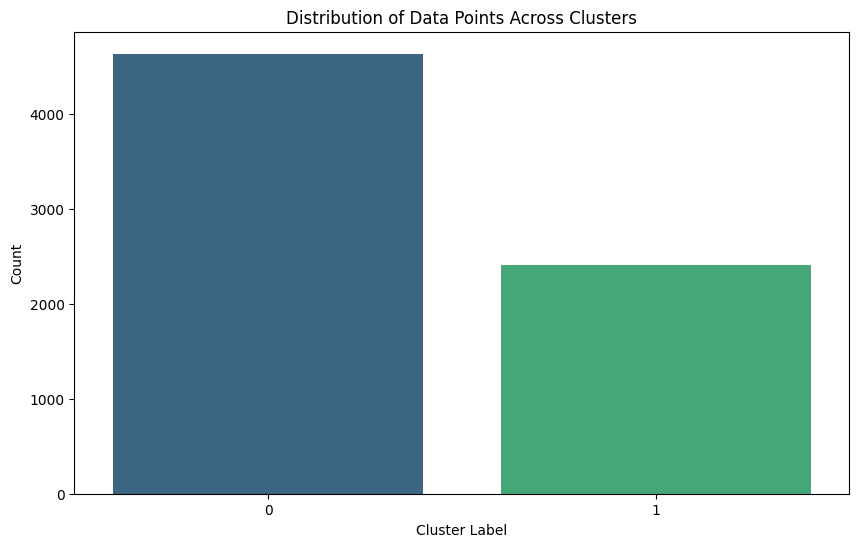

Final Silhouette Score with optimal k=2: 0.4849916541949793
Calinski-Harabasz Index: 7068.432399622987
Davies-Bouldin Score: 0.8464641898911547
Average Intra-Cluster Distance: 1.140684181510978


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
file_path = '/content/WA_Fn-UseC_-Telco-Customer-Churn.csv'  # Update with your file path
data = pd.read_csv(file_path)

# Preprocess Data
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce').fillna(0)

# Label encode categorical columns
label_encoder = LabelEncoder()
categorical_columns = data.select_dtypes(include=['object']).columns.drop(['customerID', 'Churn'])
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])
data['Churn'] = label_encoder.fit_transform(data['Churn'])

# Select numerical features and scale them
features = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
X = data[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dimensionality Reduction using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Elbow Method to find optimal k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o', color='b')
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE (Inertia)')
plt.title('Elbow Method For Optimal k')
plt.show()

# Test various k values and store silhouette scores
silhouette_scores = {}
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_pca)
    silhouette_avg = silhouette_score(X_pca, cluster_labels)
    silhouette_scores[k] = silhouette_avg
    print(f'Silhouette Score for k={k}: {silhouette_avg}')

# Plot the silhouette scores for each k value
plt.figure(figsize=(10, 6))
plt.plot(list(silhouette_scores.keys()), list(silhouette_scores.values()), marker='o', color='b')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Various k values')
plt.show()

# Choose the optimal k (e.g., the k with highest silhouette score)
optimal_k = max(silhouette_scores, key=silhouette_scores.get)
print(f'Optimal number of clusters based on silhouette score: {optimal_k}')

# Fit KMeans with the optimal k
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans_optimal.fit_predict(X_pca)

# Visualization of Clusters in 2D PCA Space
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=data['Cluster'], palette='viridis', s=60)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Customer Segments by Clusters with Optimal k')
plt.legend(title='Cluster')
plt.show()

# Cluster Distribution Diagram
plt.figure(figsize=(10, 6))
sns.countplot(x=data['Cluster'], palette='viridis')
plt.xlabel('Cluster Label')
plt.ylabel('Count')
plt.title('Distribution of Data Points Across Clusters')
plt.show()

# Evaluation Metrics
final_silhouette_score = silhouette_scores[optimal_k]
calinski_harabasz = calinski_harabasz_score(X_pca, data['Cluster'])
davies_bouldin = davies_bouldin_score(X_pca, data['Cluster'])
intra_cluster_distances = []
for i in range(optimal_k):
    cluster_points = X_pca[data['Cluster'] == i]
    cluster_center = kmeans_optimal.cluster_centers_[i]
    intra_cluster_distances.append(np.mean(np.linalg.norm(cluster_points - cluster_center, axis=1)))
avg_intra_cluster_distance = np.mean(intra_cluster_distances)

print(f'Final Silhouette Score with optimal k={optimal_k}: {final_silhouette_score}')
print(f'Calinski-Harabasz Index: {calinski_harabasz}')
print(f'Davies-Bouldin Score: {davies_bouldin}')
print(f'Average Intra-Cluster Distance: {avg_intra_cluster_distance}')


**Agglomerative clustering**

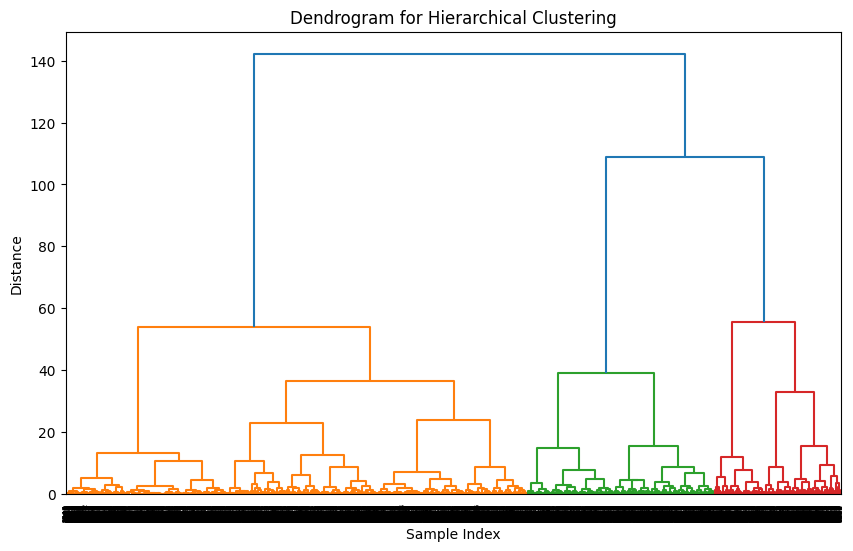

Silhouette Score for k=2: 0.4627043501712826
Silhouette Score for k=3: 0.5433139321026439
Silhouette Score for k=4: 0.5331001031325453
Silhouette Score for k=5: 0.4194499291195087
Silhouette Score for k=6: 0.38309792063119325
Silhouette Score for k=7: 0.4220135342595904
Silhouette Score for k=8: 0.4298741902852229
Silhouette Score for k=9: 0.41006713840356723
Silhouette Score for k=10: 0.42337447744369183


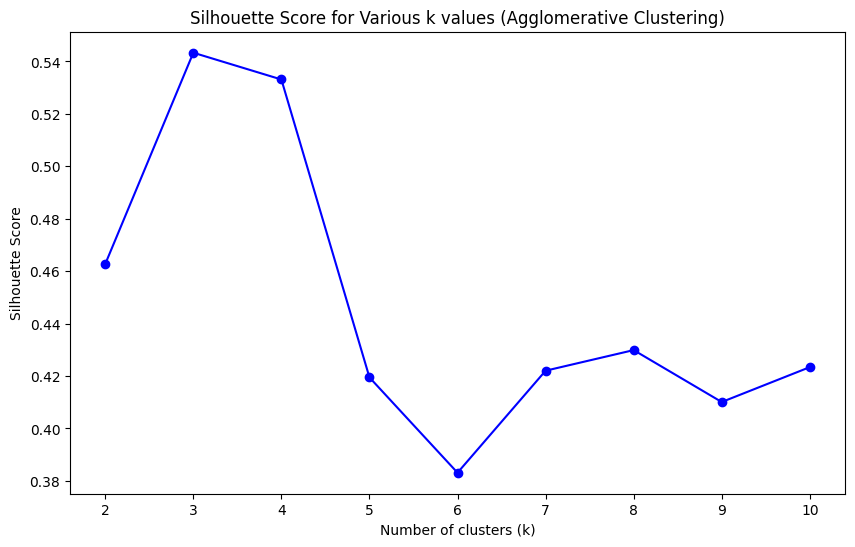

Optimal number of clusters based on silhouette score: 3


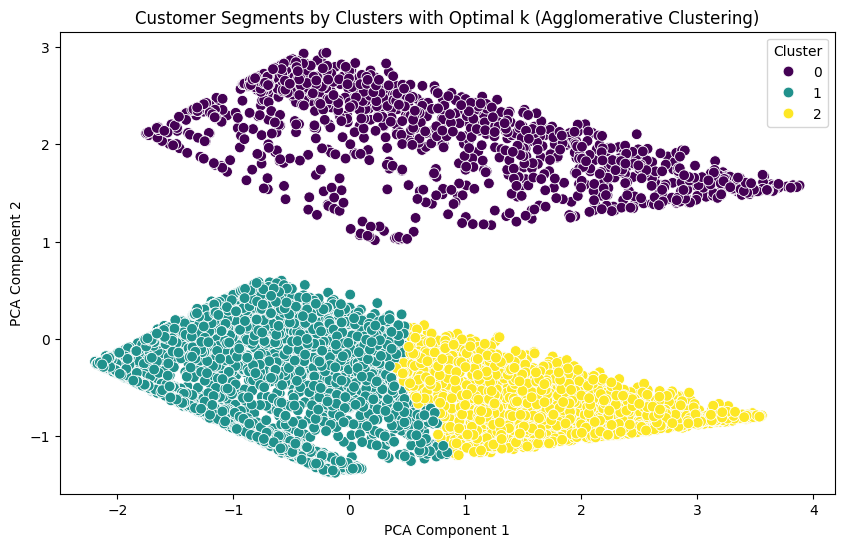

<ipython-input-6-3370b9b24cd0>:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['Cluster'], palette='viridis')


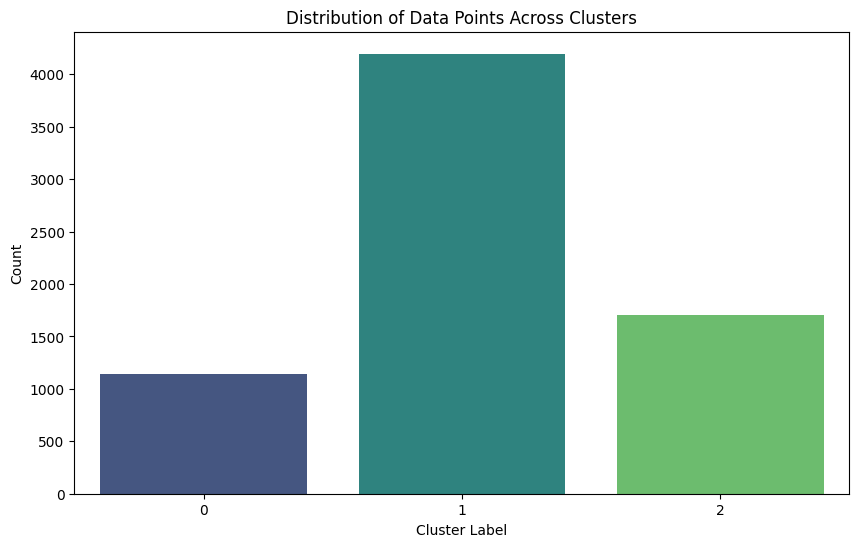

Final Silhouette Score with optimal k=3: 0.5433139321026439
Calinski-Harabasz Index: 8134.948784226769
Davies-Bouldin Score: 0.7143927466035014
Average Intra-Cluster Distance: 0.954070896998858


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the dataset
file_path = '/content/WA_Fn-UseC_-Telco-Customer-Churn.csv'  # Update with your file path
data = pd.read_csv(file_path)

# Preprocess Data
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce').fillna(0)

# Label encode categorical columns
label_encoder = LabelEncoder()
categorical_columns = data.select_dtypes(include=['object']).columns.drop(['customerID', 'Churn'])
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])
data['Churn'] = label_encoder.fit_transform(data['Churn'])

# Select numerical features and scale them
features = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
X = data[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dimensionality Reduction using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Elbow Method using linkage (sum of within-cluster distances)
linkage_matrix = linkage(X_pca, method='ward')
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# Silhouette Scores for various k values
silhouette_scores = {}
for k in range(2, 11):
    agglomerative = AgglomerativeClustering(n_clusters=k)
    cluster_labels = agglomerative.fit_predict(X_pca)
    silhouette_avg = silhouette_score(X_pca, cluster_labels)
    silhouette_scores[k] = silhouette_avg
    print(f'Silhouette Score for k={k}: {silhouette_avg}')

# Plot the silhouette scores for each k value
plt.figure(figsize=(10, 6))
plt.plot(list(silhouette_scores.keys()), list(silhouette_scores.values()), marker='o', color='b')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Various k values (Agglomerative Clustering)')
plt.show()

# Choose the optimal k based on highest silhouette score
optimal_k = max(silhouette_scores, key=silhouette_scores.get)
print(f'Optimal number of clusters based on silhouette score: {optimal_k}')

# Fit Agglomerative Clustering with the optimal k
agglo_optimal = AgglomerativeClustering(n_clusters=optimal_k)
data['Cluster'] = agglo_optimal.fit_predict(X_pca)

# Visualization of Clusters in 2D PCA Space
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=data['Cluster'], palette='viridis', s=60)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Customer Segments by Clusters with Optimal k (Agglomerative Clustering)')
plt.legend(title='Cluster')
plt.show()

# Cluster Distribution Diagram
plt.figure(figsize=(10, 6))
sns.countplot(x=data['Cluster'], palette='viridis')
plt.xlabel('Cluster Label')
plt.ylabel('Count')
plt.title('Distribution of Data Points Across Clusters')
plt.show()

# Evaluation Metrics
final_silhouette_score = silhouette_scores[optimal_k]
calinski_harabasz = calinski_harabasz_score(X_pca, data['Cluster'])
davies_bouldin = davies_bouldin_score(X_pca, data['Cluster'])
intra_cluster_distances = []
for i in range(optimal_k):
    cluster_points = X_pca[data['Cluster'] == i]
    cluster_center = cluster_points.mean(axis=0)
    intra_cluster_distances.append(np.mean(np.linalg.norm(cluster_points - cluster_center, axis=1)))
avg_intra_cluster_distance = np.mean(intra_cluster_distances)

print(f'Final Silhouette Score with optimal k={optimal_k}: {final_silhouette_score}')
print(f'Calinski-Harabasz Index: {calinski_harabasz}')
print(f'Davies-Bouldin Score: {davies_bouldin}')
print(f'Average Intra-Cluster Distance: {avg_intra_cluster_distance}')


**DBSCAN CLUSTERING**

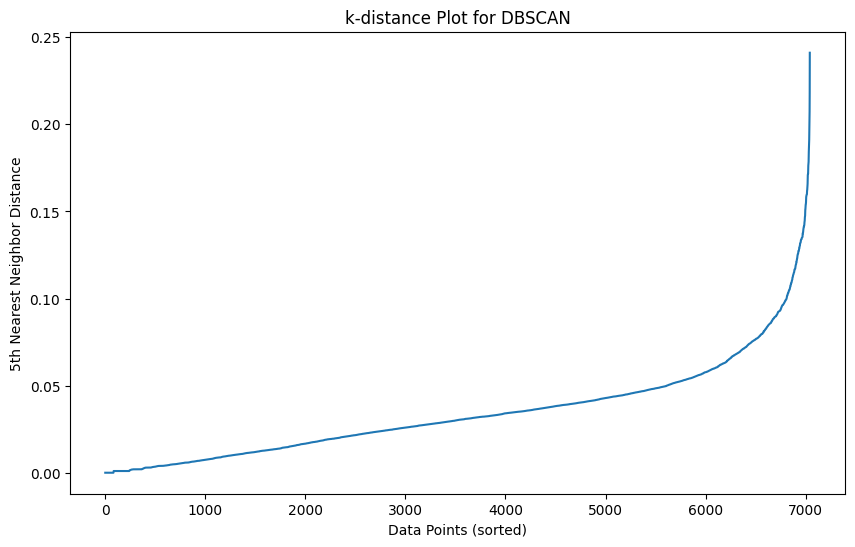

Number of clusters found (excluding noise): 2


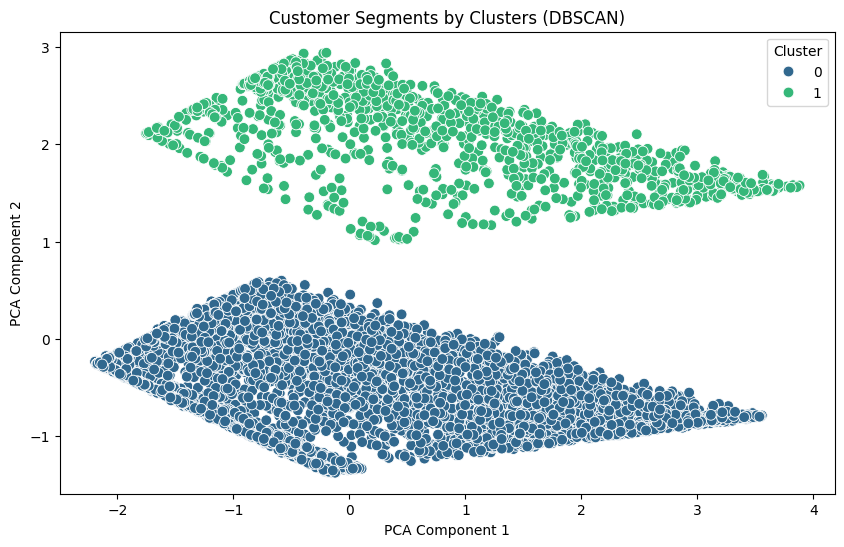

<ipython-input-5-6505c8b90152>:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['Cluster'], palette='viridis')


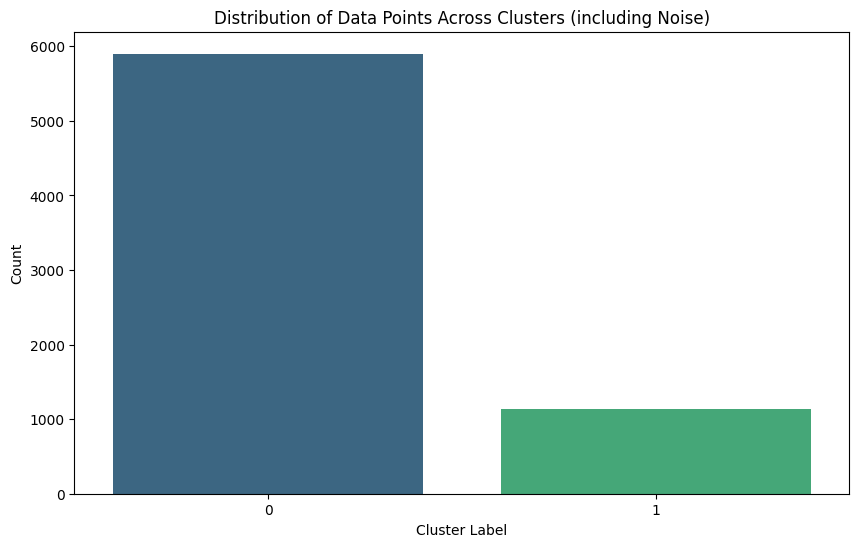

Silhouette Score (excluding noise): 0.45424355213698536
Calinski-Harabasz Index (excluding noise): 2936.447326792718
Davies-Bouldin Score (excluding noise): 0.9990949810805695
Average Intra-Cluster Distance (excluding noise): 1.3283500615393669


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
file_path = '/content/WA_Fn-UseC_-Telco-Customer-Churn.csv'  # Update with your file path
data = pd.read_csv(file_path)

# Preprocess Data
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce').fillna(0)

# Label encode categorical columns
label_encoder = LabelEncoder()
categorical_columns = data.select_dtypes(include=['object']).columns.drop(['customerID', 'Churn'])
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])
data['Churn'] = label_encoder.fit_transform(data['Churn'])

# Select numerical features and scale them
features = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
X = data[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dimensionality Reduction using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Elbow-like Method for DBSCAN (k-distance plot for optimal epsilon selection)
from sklearn.neighbors import NearestNeighbors
nearest_neighbors = NearestNeighbors(n_neighbors=5)
neighbors = nearest_neighbors.fit(X_pca)
distances, indices = neighbors.kneighbors(X_pca)
distances = np.sort(distances[:, 4], axis=0)

plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.xlabel('Data Points (sorted)')
plt.ylabel('5th Nearest Neighbor Distance')
plt.title('k-distance Plot for DBSCAN')
plt.show()

# Fit DBSCAN model
dbscan = DBSCAN(eps=0.5, min_samples=5)
data['Cluster'] = dbscan.fit_predict(X_pca)

# Count the number of clusters (excluding noise points labeled as -1)
num_clusters = len(np.unique(data['Cluster'][data['Cluster'] != -1]))
print(f"Number of clusters found (excluding noise): {num_clusters}")

# Visualization of Clusters in 2D PCA Space
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=data['Cluster'], palette='viridis', s=60)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Customer Segments by Clusters (DBSCAN)')
plt.legend(title='Cluster')
plt.show()

# Cluster Distribution Diagram
plt.figure(figsize=(10, 6))
sns.countplot(x=data['Cluster'], palette='viridis')
plt.xlabel('Cluster Label')
plt.ylabel('Count')
plt.title('Distribution of Data Points Across Clusters (including Noise)')
plt.show()

# Evaluation Metrics (excluding noise points)
if num_clusters > 1:
    core_samples = data['Cluster'] != -1
    silhouette_avg = silhouette_score(X_pca[core_samples], data['Cluster'][core_samples])
    calinski_harabasz = calinski_harabasz_score(X_pca[core_samples], data['Cluster'][core_samples])
    davies_bouldin = davies_bouldin_score(X_pca[core_samples], data['Cluster'][core_samples])

    # Calculate average intra-cluster distance
    intra_cluster_distances = []
    for cluster_label in np.unique(data['Cluster'][core_samples]):
        cluster_points = X_pca[data['Cluster'] == cluster_label]
        cluster_center = cluster_points.mean(axis=0)
        intra_cluster_distances.append(np.mean(np.linalg.norm(cluster_points - cluster_center, axis=1)))
    avg_intra_cluster_distance = np.mean(intra_cluster_distances)

    print(f'Silhouette Score (excluding noise): {silhouette_avg}')
    print(f'Calinski-Harabasz Index (excluding noise): {calinski_harabasz}')
    print(f'Davies-Bouldin Score (excluding noise): {davies_bouldin}')
    print(f'Average Intra-Cluster Distance (excluding noise): {avg_intra_cluster_distance}')
else:
    print("Evaluation metrics cannot be calculated with a single cluster or only noise.")
